In [2]:
import numpy as np
import os
from matplotlib import pyplot as plt

In [13]:
def detect_namespace(namespace:str):
    content = namespace[namespace.find("(")+1:-1].split(", ")
    arg_dict = {}
    for arg in content:
        arg_type, arg_value = arg.split("=")
        arg_dict[arg_type] = arg_value
    return arg_dict

def get_acc(line:str, delimiter=":", precision=4):
    index = line.find(delimiter) + len(delimiter)
    acc = line[index:index + 3 + precision]
    return float(acc)

def get_std(line:str, delimiter="std:", precision=4):
    index = line.find(delimiter) + len(delimiter)
    acc = line[index:index + 3 + precision]
    return float(acc)

def get_rm(line:str, delimiter="removed", precision=4):
    index = line.find(delimiter) + len(delimiter)
    acc = line[index:index + 3 + precision]
    return float(acc)

def get_scnd(line:str, delimiter="masking:", precision=4):
    index = line.find(delimiter) + len(delimiter)
    scnd = line[index:]
    return float(scnd)


def parse_file(f):
    for line in f:
        if line.find("Namespace") != -1:
            arg_dict = detect_namespace(line)
        if line.find("No mask no noise") != -1:
            acc = get_acc(line)
        if line.find("No mask noise average acc") != -1:
            NM = get_acc(line)
            NM_std = get_std(line)
        if line.find("S grad before masking:") != -1:
            scnd = get_scnd(line)
    if NM == 0:
        raise Exception
    return arg_dict, acc, NM, NM_std, scnd

def parse_file_rec(f):
    acc_L = []
    NM_L = []
    NM_std_L = []
    acc_L = []
    each_L = []
    scnd_L = []
    for line in f:
        if line.find("Namespace") != -1:
            arg_dict = detect_namespace(line)
        if line.find("No mask no noise:") != -1:
            acc = get_acc(line)
            acc_L.append(acc)
        if line.find("No mask noise each:") != -1:
            each = get_acc(line)
            each_L.append(each)
        if line.find("No mask noise average acc") != -1:
            NM = get_acc(line)
            NM_std = get_std(line)
            NM_L.append(NM)
            NM_std_L.append(NM_std)
        if line.find("S grad before masking:") != -1:
            scnd = get_scnd(line)
            scnd_L.append(scnd)
    if NM == 0:
        raise Exception
    return arg_dict, acc_L, each_L, NM_L, NM_std_L, scnd_L


In [14]:
def find_files(dir_path):
    file_blob = os.listdir(dir_path)
    acc_1 = []
    NM_1 = []
    scnd_1 = []
    for fn in file_blob:
        # cfn = os.path.join(dir_path, fn)
        # with open(cfn) as f:
        #     f = f.read().split("\n")
        # arg_dict, NM, FT, NM_std, FT_std, RM = parse_file(f)
        cfn = os.path.join(dir_path, fn)
        with open(cfn) as f:
            f = f.read().split("\n")
        # try:
        arg_dict, acc, NM, NM_std, scnd = parse_file(f)
        acc_1.append(acc)
        NM_1.append(NM)
        scnd_1.append(scnd)
    acc_1 = np.array(acc_1)
    NM_1 = np.array(NM_1)
    scnd_1 = np.array(scnd_1)
    return acc_1, NM_1, scnd_1

dir_path = "./NAS/0.1-0.1/"
acc_1, NM_1, scnd_1 = find_files(dir_path)
dir_path = "./NAS/0.2-0.2/"
acc_2, NM_2, scnd_2 = find_files(dir_path)
dir_path = "./NAS/0.3-0.3/"
acc_3, NM_3, scnd_3 = find_files(dir_path)

In [15]:
dir_path = "./NAS/Each/"
file_blob = os.listdir(dir_path)
acc_1 = []
NM_1 = []
scnd_1 = []
each_1 = []
for fn in file_blob:
    # cfn = os.path.join(dir_path, fn)
    # with open(cfn) as f:
    #     f = f.read().split("\n")
    # arg_dict, NM, FT, NM_std, FT_std, RM = parse_file(f)
    cfn = os.path.join(dir_path, fn)
    with open(cfn) as f:
        f = f.read().split("\n")
    # try:
    arg_dict, acc, each, NM, NM_std, scnd = parse_file_rec(f)
    acc_1 += acc
    NM_1 += NM
    scnd_1 += scnd
    each_1 += each
acc_1 = np.array(acc_1)
NM_1 = np.array(NM_1)
scnd_1 = np.array(scnd_1)
each_1 = np.array(each_1)
print(each_1)

[0.9388 0.9344 0.9385 ... 0.9894 0.9888 0.9905]


Text(0.5, 0, 'Accuracy')

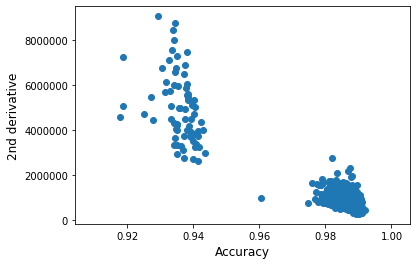

In [16]:
plt.scatter(NM_1, scnd_1)
plt.ylabel("2nd derivative", fontsize=12)
plt.xlabel("Accuracy", fontsize=12)

Text(0.5, 0, 'Accuracy Drop')

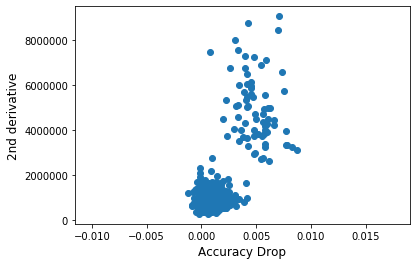

In [17]:
plt.scatter(acc_1 - NM_1, scnd_1)
plt.ylabel("2nd derivative", fontsize=12)
plt.xlabel("Accuracy Drop", fontsize=12)

Text(0.5, 0, 'Accuracy')

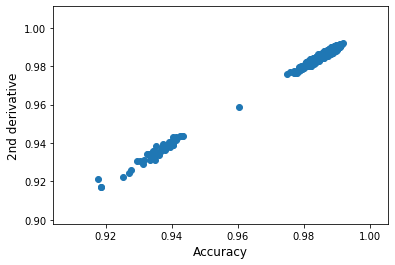

In [19]:
plt.scatter(NM_1, each_1)
plt.ylabel("2nd derivative", fontsize=12)
plt.xlabel("Accuracy", fontsize=12)

In [41]:
ch1L = [ 6, 12, 24]
ch2L = [16, 32, 64]
kN1L = [1, 3, 5, 7]
kN2L = [1, 3, 5, 7]
Y = []
n_files = 8
n_archs = len(NM_1)//n_files
for i in range(n_archs):
    this_instance = 0
    for j in range(n_files):
        this_instance += NM_1[j * n_archs + i]
    Y.append(this_instance / n_files)

X = []
for i in range(n_archs):
    ch1L = [ 6, 12, 24]
    ch2L = [16, 32, 64]
    kN1L = [1, 3, 5, 7]
    kN2L = [1, 3, 5, 7]
    hot = [[0 for _ in range(3)], [0 for _ in range(3)], [0 for _ in range(4)], [0 for _ in range(4)]]
    ch1I = i % len(ch1L)
    ch2I = (i // len(ch1L)) % len(ch2L)
    kN1I = (i // len(ch1L) // len(ch2L)) % len(kN1L)
    kN2I = (i // len(ch1L) // len(ch2L) // len(kN1L)) % len(kN2L)
    hot[0][ch1I] = 1
    hot[1][ch2I] = 1
    hot[2][kN1I] = 1
    hot[3][kN2I] = 1
    h = []
    for i in range(len(hot)):
        h += hot[i]
    X.append(h)

In [68]:
import torch
from torch import nn

class Regressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(14, 30)
        self.fc2 = nn.Linear(30, 1)
        self.act = nn.ReLU()
        self.sig = nn.Sigmoid()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.act(x)
        x = self.fc2(x)
        x = self.sig(x)
        return x    

def Train(epochs, verbose=False):
    best_acc = 0.0
    for i in range(epochs):
        model.train()
        running_loss = 0.
        # for images, labels in tqdm(trainloader):
        for images, labels in trainloader:
            optimizer.zero_grad()
            images, labels = images.to(device), labels.to(device)
            # images = images.view(-1, 784)
            outputs = model(images)
            loss = criteria(outputs,labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        if verbose == True:
            if i % (epochs // 10) == 0:
                print(running_loss)


In [71]:
model = Regressor()
dataset = []
for i in range(144):
    dataset.append((torch.Tensor(X[i]), torch.Tensor([float(Y[i])])))

trainloader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True, num_workers=2)
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-3, momentum=0.9)
criteria = torch.nn.MSELoss()
device = torch.device("cuda:0")
model.to(device)

Regressor(
  (fc1): Linear(in_features=14, out_features=30, bias=True)
  (fc2): Linear(in_features=30, out_features=1, bias=True)
  (act): ReLU()
  (sig): Sigmoid()
)

In [72]:
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-1, momentum=0.9)
# optimizer = torch.optim.Adam(model.parameters(), lr = 1e-1)
Train(3)
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-2, momentum=0.9)
# optimizer = torch.optim.Adam(model.parameters(), lr = 1e-1)
Train(100, True)

0.0018707051494857296
0.0018414404585200828
0.0018129194650100544
0.001787425642760354
0.0017639037505432498
0.0017426377125957515
0.001723017976473784
0.0017050839815055951
0.0016883932294149417
0.0016730074712540954


In [40]:
for images, labels in trainloader:
    optimizer.zero_grad()
    images, labels = images.to(device), labels.to(device)
    # images = images.view(-1, 784)
    outputs = model(images)
    print(outputs - labels)
    break

tensor([[-0.0490],
        [ 0.0214],
        [ 0.0952],
        [ 0.0120],
        [ 0.0090],
        [ 0.0168],
        [ 0.0102],
        [ 0.0121],
        [-0.0321],
        [ 0.0070],
        [ 0.0139],
        [-0.0376],
        [ 0.0248],
        [-0.0059],
        [ 0.0315],
        [ 0.0053]], device='cuda:0', grad_fn=<SubBackward0>)


In [227]:
import sklearn
from sklearn import svm
from sklearn.linear_model import SGDRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn import tree
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.8, random_state=1)
clf = tree.DecisionTreeRegressor(max_depth=5)
# clf = MLPRegressor(random_state=1, max_iter=500, solver="sgd")

In [228]:
clf.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [229]:
y_result = clf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_result)))

0.0020700815786960747


In [230]:
y_result = clf.predict(X_train)
print(np.sqrt(mean_squared_error(y_train, y_result)))

0.000278473397357321
